# 1.Import Libraries

In [44]:
import pandas as pd
from tensorflow import keras
from keras import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from keras.layers import Flatten,Dense

# 2.Import Data set

In [3]:
forest=pd.read_csv('forestfires (1).csv')
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


# 3.Data Undestanding

In [4]:
forest.shape

(517, 31)

In [5]:
forest.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
forest.describe(include='all')

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517
unique,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,small
freq,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378
mean,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,NaN
std,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,NaN
min,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [16]:
forest['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [17]:
forest.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

# 4.Data Preprocessing

In [10]:
forest.drop(['month','day'],axis=1,inplace=True)

In [21]:
label_encoder=LabelEncoder()

In [22]:
forest['size_category']=label_encoder.fit_transform(forest['size_category'])

In [23]:
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [25]:
X=forest.drop('size_category',axis=1)
y=forest[['size_category']]

### Normalizing

In [26]:
minmax=MinMaxScaler()

In [28]:
X_norm=minmax.fit_transform(X)

### Splitting data

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,random_state=99,stratify=y,test_size=0.2)

# 5.Model Building

## 5.1 Model Architecture

In [37]:
model=Sequential()
model = Sequential()
model.add(Dense(8, input_dim=28, activation='linear'))
model.add(Dense(4,  activation='tanh'))
model.add(Dense(1,  activation='sigmoid'))

## 5.2 Model Compilation

In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

# 6.Model Training

In [41]:
model_training=model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
13/13 [==============================] - 0s 6ms/step - loss: 0.5431 - accuracy: 0.7482 - val_loss: 0.5717 - val_accuracy: 0.7500
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.5426 - accuracy: 0.7482 - val_loss: 0.5714 - val_accuracy: 0.7500
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 0.5418 - accuracy: 0.7482 - val_loss: 0.5715 - val_accuracy: 0.7500
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 0.5416 - accuracy: 0.7506 - val_loss: 0.5705 - val_accuracy: 0.7500
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.5404 - accuracy: 0.7482 - val_loss: 0.5703 - val_accuracy: 0.7500
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 0.5401 - accuracy: 0.7482 - val_loss: 0.5692 - val_accuracy: 0.7500
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 0.5395 - accuracy: 0.7506 - val_loss: 0.5700 - val_accuracy: 0.7500
Epoch 8/200
1

# 7.Model Evaluation

In [42]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8942


[0.3847491145133972, 0.8942307829856873]

# 8.Model Prediction

In [43]:
y_pred=model.predict(X_test)

# 9.Model Performance

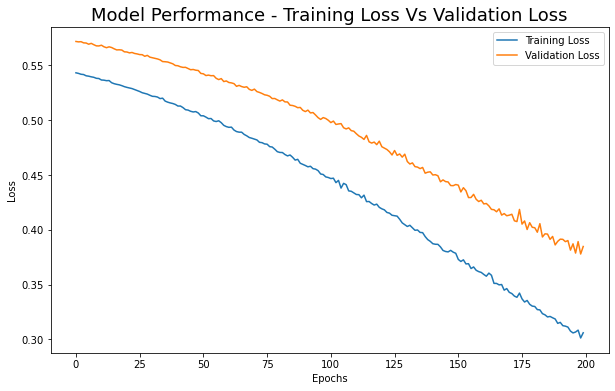

In [46]:
plt.figure(figsize=(10,6))
plt.plot(model_training.history['loss'],    label = 'Training Loss')
plt.plot(model_training.history['val_loss'],label = 'Validation Loss')

plt.title('Model Performance - Training Loss Vs Validation Loss',size = 18)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

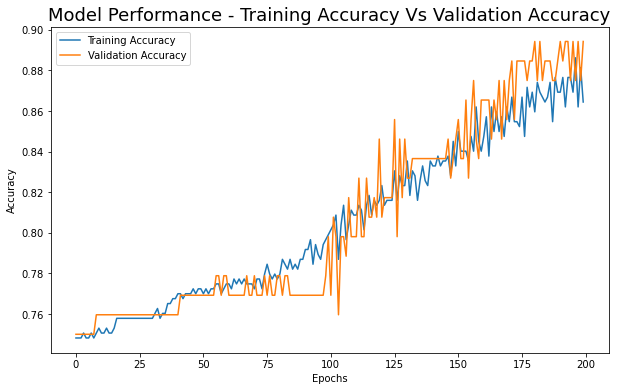

In [48]:
plt.figure(figsize=(10,6))
plt.plot(model_training.history['accuracy'],    label = 'Training Accuracy')
plt.plot(model_training.history['val_accuracy'],label = 'Validation Accuracy')

plt.title('Model Performance - Training Accuracy Vs Validation Accuracy',size = 18)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()